## k nearest neibhouber

In [6]:
from sklearn.datasets import load_iris
import pandas as pd

In [4]:
iris = load_iris()

In [10]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [20]:
df['target'] = iris.target
df['target_name'] = df.target.apply(lambda x: iris.target_names[x])

In [22]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [28]:
df1 = df[df['target'] ==0]
df2 = df[df['target'] ==1]
df3 = df[df['target'] ==2]

In [48]:
import matplotlib.pyplot as plt

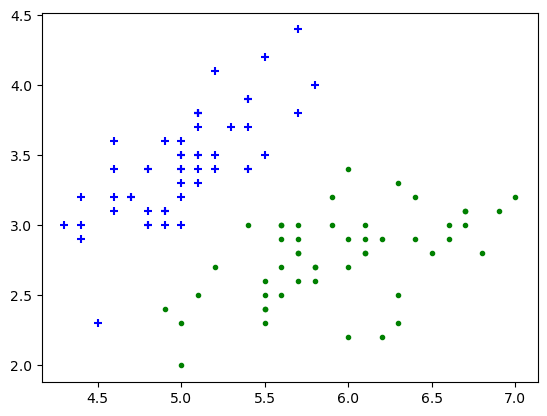

In [64]:
plt.scatter(df1["sepal length (cm)"], df1["sepal width (cm)"], marker='+', color='blue')
plt.scatter(df2["sepal length (cm)"], df2["sepal width (cm)"], marker='.', color='green')


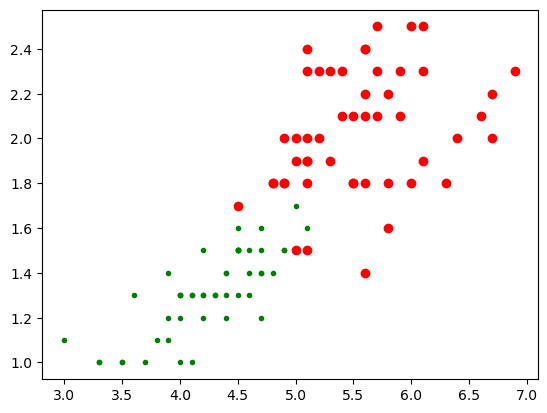

In [62]:
plt.scatter(df2["petal length (cm)"], df2["petal width (cm)"], marker='.', color='green')
plt.scatter(df3["petal length (cm)"], df3["petal width (cm)"], marker='o', color='red')

Split x and y for model trining

In [101]:
X = df.drop(['target','target_name'], axis=1)
y = df.target

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

### from sklearn.neighbors import KNeighborsClassifier

In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [112]:
knn = KNeighborsClassifier(n_neighbors=10)

# Train the model
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=10)

In [114]:
knn.score(X_test, y_test)

1.0

### Plot Confusion Matrix

In [121]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 11]], dtype=int64)

In [127]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns 

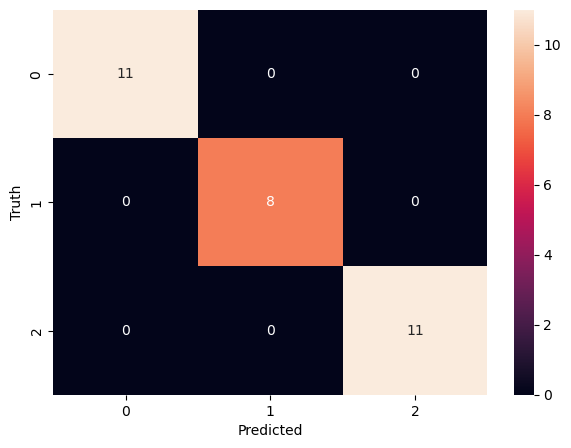

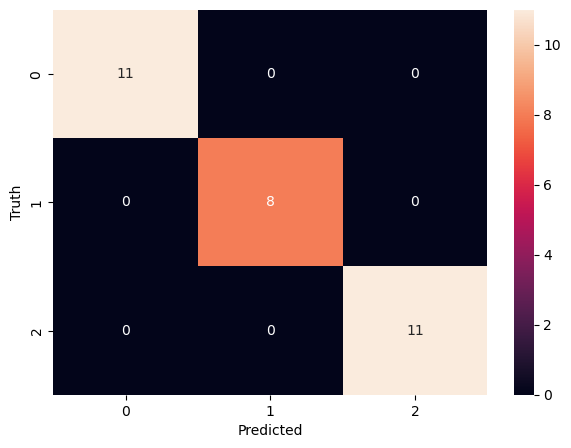

<Figure size 700x500 with 0 Axes>

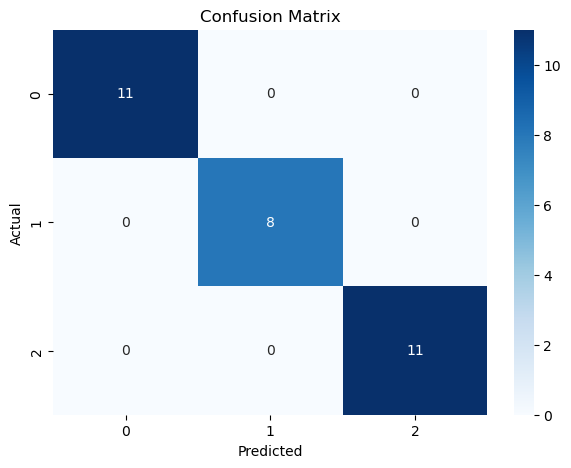

In [129]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # fmt='d' to show integers
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()